# Chapter 4: Solving Differential Equations

## Galactic collisions

Module ```galcol``` contains functions for setup, numerical integration, and visualization

In [1]:
import galcol

In [2]:
dir(galcol)

['Axes3D',
 'Circle',
 'FuncAnimation',
 'G',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'anim_disk_2d',
 'anim_disk_3d',
 'anim_orbits',
 'anim_two_disks_2d',
 'anim_two_disks_3d',
 'evolve_disk',
 'evolve_two_disks',
 'init_disk',
 'kpc',
 'np',
 'parameters',
 'plt',
 'show_disk_3d',
 'show_orbits',
 'show_two_disks_2d',
 'show_two_disks_3d',
 'unit']

#### Example: Whirlpool-like galaxy

This is an example for a nearly edge-on collision. A smaller intruder galaxy moves under an angle of 45° in the $xy$-plane with an impact velocity of about 130 km/s toward a larger, more massive target galaxy. The impact parameter is 6 kpc in $z$-direction.

First we define the parameters of the intruder and target galaxies.

In [1]:
import galcol
import astropy.units as unit

In [2]:
galaxies = {
    'intruder' : galcol.parameters(
        # mass in solar masses
        1e10, 
        # disk radius in kpc
        5, 
        # Cartesian coordinates (x,y,z) of initial position in kpc 
        (25,-25,-5), 
        # x-, y-, z-components of initial velocity in km/s
        (-75,75,0),
        # normal to galactic plane (disk is in xy-plane)
        (0,0,1), 
        # number of rings (each ring will be randomly populated with 1000/5 = 200 stars)
        5, 
        # total number of stars
        1000, 
        # softening factor defines inner edge of disk (in units of disk radius)
        0.025),
    'target' : galcol.parameters(5e10, 10, (-5,5,1), (15,-15,0), (1,-1,2**0.5), 10, 4000, 0.025),
}

In [5]:
galaxies['intruder']

{'mass': <Quantity 1.e+10 solMass>,
 'radius': <Quantity 5. kpc>,
 'center_pos': <Quantity [ 25., -25.,  -5.] kpc>,
 'center_vel': <Quantity [-75.,  75.,   0.] km / s>,
 'normal': (0, 0, 1),
 'N_rings': 5,
 'N_stars': 1000,
 'softening': 0.025}

In [3]:
galcol.init_disk(galaxies['intruder'])
galcol.init_disk(galaxies['target'])

Plane normal: phi = -45.0°, theta = 45.0°


The dictionaries of the two galaxies now contain additional items, particularly the inititial data of the stars.

In [4]:
galaxies['target']

{'mass': <Quantity 5.e+10 solMass>,
 'radius': <Quantity 10. kpc>,
 'center_pos': <Quantity [-5.,  5.,  1.] kpc>,
 'center_vel': <Quantity [ 15., -15.,   0.] km / s>,
 'normal': (1, -1, 1.4142135623730951),
 'N_rings': 10,
 'N_stars': 4000,
 'softening': 0.025,
 'stars_pos': <Quantity [[-4.47573982, -4.781556  , -4.40739091, ...,  2.97689513,
              2.16609963, -2.7982992 ],
            [ 5.13604861,  4.99471709,  4.82987976, ..., 10.00588778,
             11.29332029, -1.4458953 ],
            [ 0.72549296,  0.84180119,  0.46066892, ..., -1.10081944,
              0.38285181, -5.11477384]] kpc>,
 'stars_vel': <Quantity [[ 80.89449806, 405.15157585, 270.60145499, ..., -23.41620621,
             -49.91156574, 142.54889579],
            [488.67310995, 740.41625074, 412.08218393, ...,  88.58219545,
              69.45380631,  62.17200562],
            [309.55622513, 258.28112854, 121.25518628, ..., 100.40803273,
             105.61726745, -35.62184066]] km / s>,
 'vel_scale': <Quan

Solve equations of motion and visualize data.

In [5]:
t, data = galcol.evolve_two_disks(galaxies['target'], galaxies['intruder'], 
                                  N_steps=10000, N_snapshots=500, time_step=0.05*unit.Myr)

Solving equations of motion for two galaxies (Leapfrog integration)
100 % (stopped at t = 500.0 Myr)


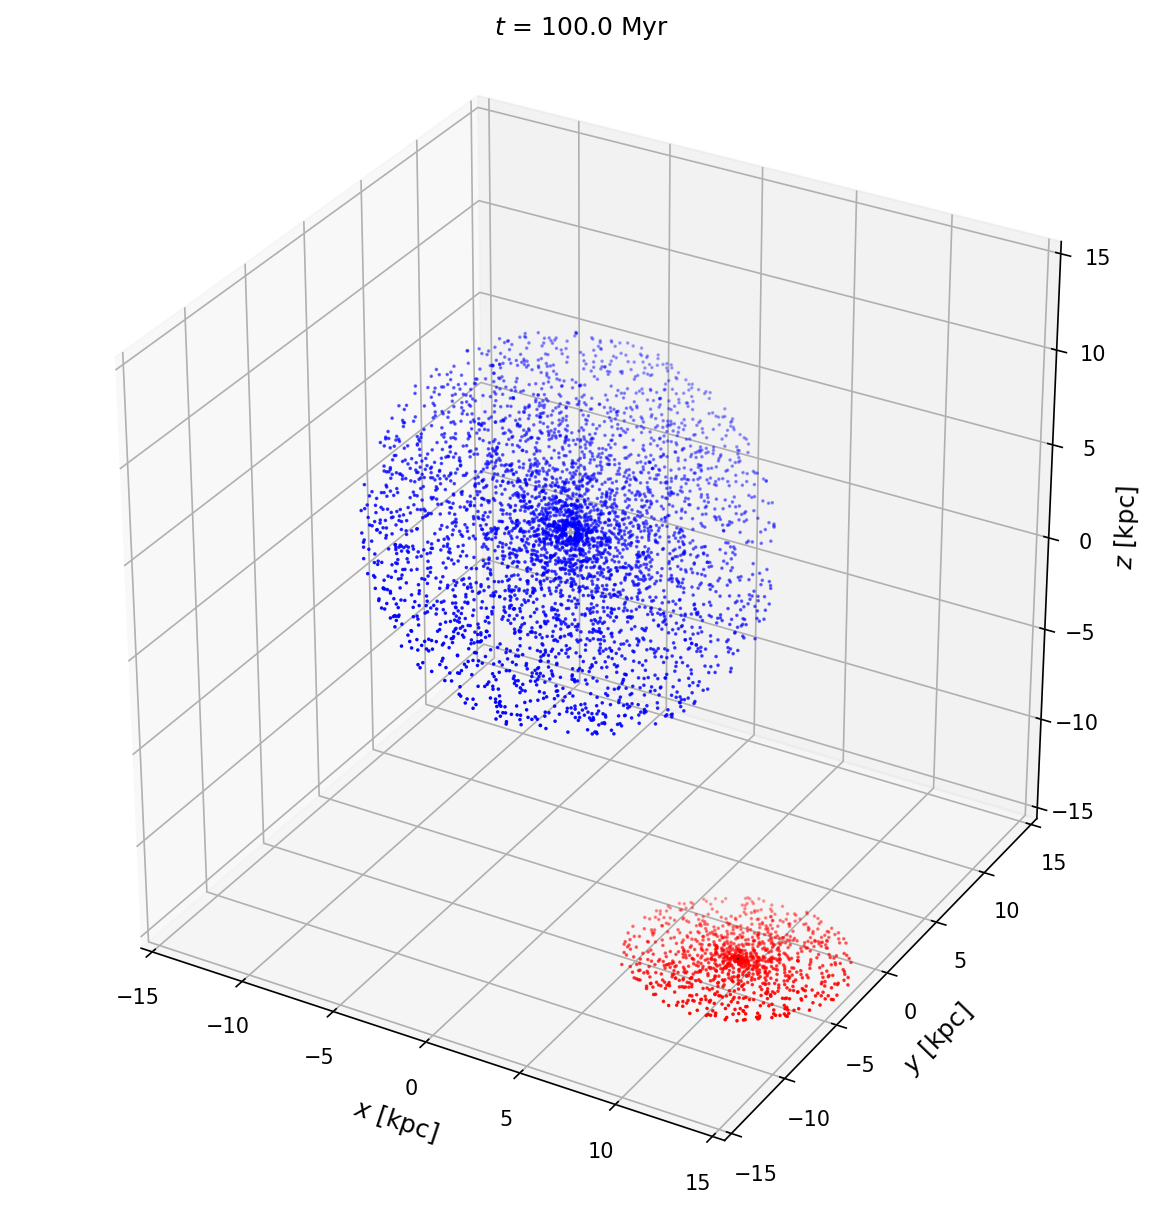

In [8]:
i = 100
galcol.show_two_disks_3d(data[i,:,:], galaxies['target']['N_stars'], 
                         [-15,15], [-15,15], [-15,15], t[i], name='two_disks')

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

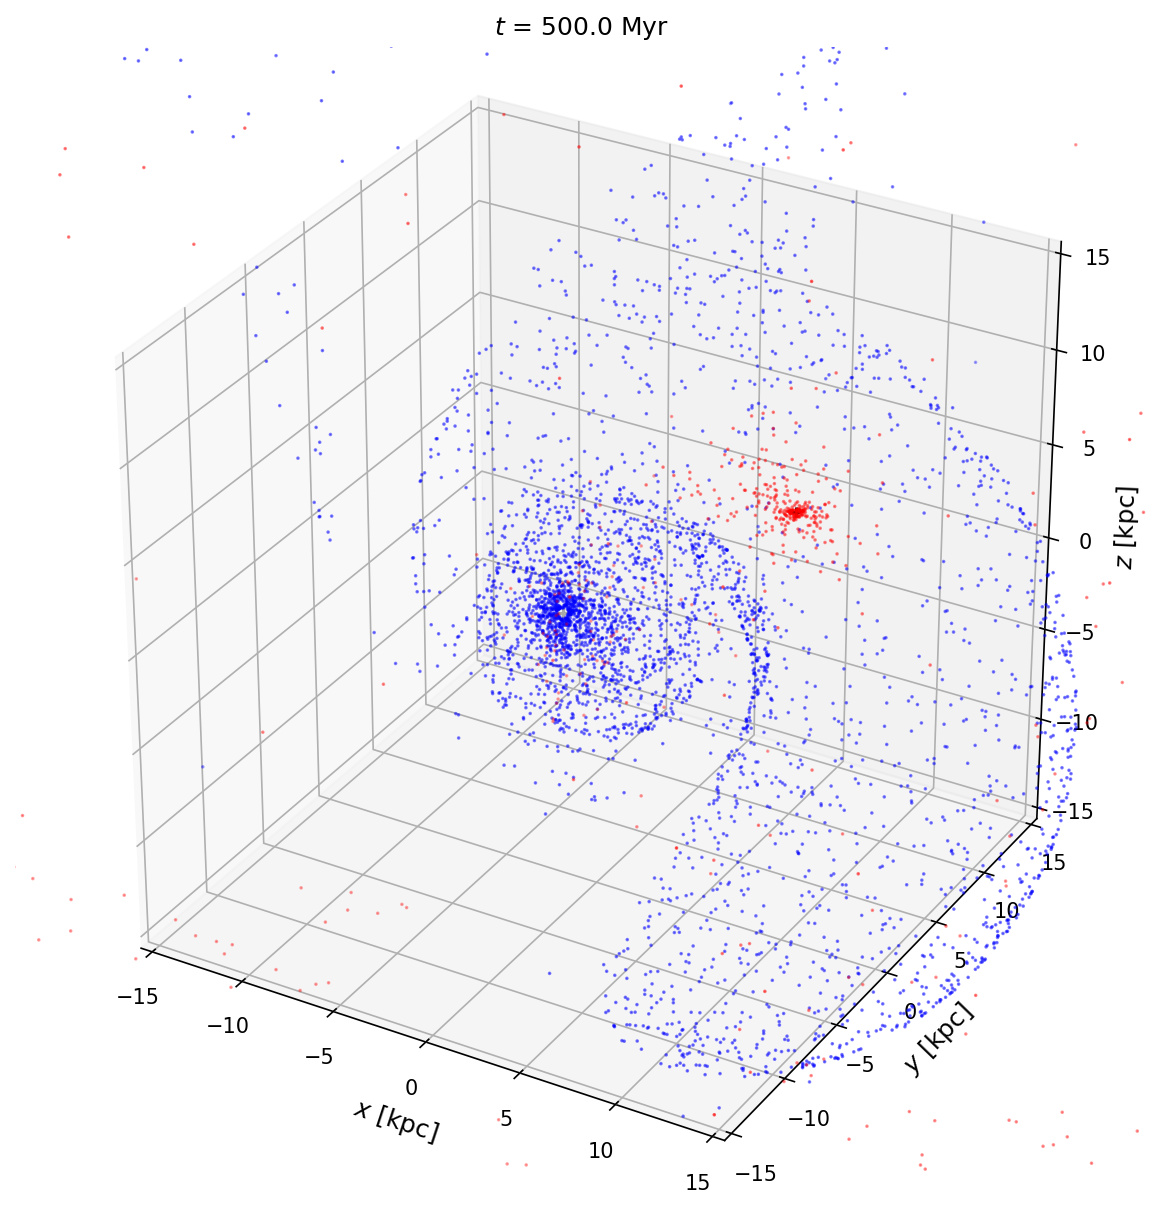

In [11]:
galcol.anim_two_disks_3d(data, galaxies['target']['N_stars'], 
                         [-15,15], [-15,15], [-15,15], t, name='two_disks')

## Stellar Clusters

In [ ]:
import numpy as np

n_files = 501

for n in range(n_files):
    # load n-th snapshot from file
    snapshot = np.loadtxt(
        "data_files/nbody/output_{:d}.dat".format(n), dtype='float64')
    
    if n == 0:  # create data array with first snapshot as element
        data = np.array([snapshot])
    else:  # append further snapshots to data array
        data = np.append(data, [snapshot], axis=0)

In [ ]:
data.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,4), dpi=100)
plt.hist(data[0,:,1], 20, histtype='step', lw=2)
plt.xlabel('$M/M_\odot$')
plt.ylabel('$N$')
plt.savefig('cluster_hist_mass.pdf')

In [ ]:
print("Average mass: {:.3f} solar masses".format(np.mean(data[0,:,1])))

In [ ]:
from astropy.constants import au,pc

r = np.sqrt(data[:,:,2]**2 + 
            data[:,:,3]**2 + 
            data[:,:,4]**2) * au/pc

v = np.sqrt(data[:,:,5]**2 + data[:,:,6]**2 + data[:,:,7]**2)

In [ ]:
plt.figure(figsize=(12,8), dpi=200)

n_bins = 25

plt.subplot(231)
plt.hist(r[0,:], n_bins, range=[0,50], 
         histtype='step', lw=2, color='mediumblue')
plt.xlabel("$r$ [pc]")
plt.ylabel("$N$")
plt.ylim(0,250)
plt.title("$t=0$")

plt.subplot(232)
plt.hist(r[100,:], n_bins, range=[0,50], 
         histtype='step', lw=2, color='mediumblue')
plt.xlabel("$r$ [pc]")
plt.ylim(0,250)
plt.title("$t={:.0f}\,$Myr".format(100*0.2))

plt.subplot(233)
plt.hist(r[500,:], n_bins, range=[0,50], 
         histtype='step', lw=2, color='mediumblue')
plt.xlabel("$r$ [pc]")
plt.ylim(0,250)
plt.title("$t={:.0f}\,$Myr".format(500*0.2))

plt.subplot(234)
plt.hist(v[0,:], n_bins, range=[0,3.5], 
         histtype='step', lw=2, color='red')
plt.xlabel("$v$ [km/s]")
plt.ylabel("$N$")
plt.ylim(0,120)

plt.subplot(235)
plt.hist(v[100,:], n_bins, range=[0,3.5], 
         histtype='step', lw=2, color='red')
plt.xlabel("$v$ [km/s]")
plt.ylim(0,120)

plt.subplot(236)
plt.hist(v[500,:], n_bins, range=[0,3.5], 
         histtype='step', lw=2, color='red')
plt.xlabel("$v$ [km/s]")
plt.ylim(0,120)

plt.savefig("cluster_hist_evol.pdf")

In [ ]:
t = np.linspace(0,100,n_files)

r_rms = np.sqrt(np.mean(r**2, axis=1))
v_rms = np.sqrt(np.mean(v**2, axis=1))

r_median = np.median(r, axis=1)

In [ ]:
plt.figure(figsize=(10.5,3.5), dpi=200)

plt.subplot(121)
plt.plot(t, r_rms, color='mediumblue')
plt.plot(t, r_median, ls='dashed', color='mediumblue')
plt.xlabel("$t$ [Myr]")
plt.ylabel("$r_\mathrm{RMS}$ [pc]")
plt.ylim(0,30)

plt.subplot(122)
plt.plot(t, v_rms, color="red")
plt.xlabel("$t$ [Myr]")
plt.ylabel("$v_\mathrm{RMS}$ [km/s]")
plt.ylim(0,1.8)

plt.savefig("cluster_evol_rms.pdf")

## Expansion of the Universe

In [ ]:
import numpy as np
import astropy.units as unit
from numkit import rk4_step

In [ ]:
# Hubble constant with astropy units
H0 = 67.7*unit.km/unit.s/unit.Mpc
print("H0 = {:.2e}".format(H0.to(1/unit.Gyr)))

# dictionary of cosmological models
cosmology = {
    'standard' : (0.309, 1e-5, 0.691),
    'matter sub'   : (0.309, 1e-5, 0),
    'matter crit'  : (1, 0, 0),
    'matter super' : (2, 0, 0),
}

Friedmann equation

In [ ]:
def dota(t, a, OmegaM, OmegaR, OmegaL, H0):
    Omega0 = OmegaM + OmegaR + OmegaL
    return H0 * (OmegaM/a + OmegaR/a**2 + OmegaL*a**2 + 1 - Omega0)**(1/2)

Test of numerical time step

In [ ]:
# numerical values for time in Gyr
H0_num = H0.to(1/unit.Gyr).value
t_H = 1/H0_num

t_max = 0.1*t_H
n = 10

while n <= 1000:
    t, a = 0, 0.01 # initial values
    dt = t_max/n   # time step

    # numerical integration from 0 to t_max
    for i in range(n):
        a = rk4_step(dota, t, a, dt, *cosmology['standard'], H0_num)
        t += dt 
    
    print("{:4d} {:.8e}".format(n,a))
    n *= 2

Integration of Friedmann equation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4), dpi=100)

n = 1000
dt = 2*t_H/n
t = np.linspace(0, 2*t_H, n+1)

for model in cosmology:
    a = np.zeros(n+1)
    a[0] = 1e-2

    # numerical integration of the model
    for i in range(n):
        a[i+1] = rk4_step(dota, t[i], a[i], dt, *cosmology[model], H0_num)
    
    # plot the scale factor as function of time
    label = "$\Omega_{\mathrm{M}}=$"
    label += "{:.1f}, $\Omega_\Lambda=${:.1f}".\
        format(cosmology[model][0],cosmology[model][2])
    if model == "standard":
        plt.plot(t, a, label=label)
    else:
        plt.plot(t, a, ls='dashed', label=label)
    
plt.xlabel("$t$ / Gyr")
plt.ylabel("$a$")
plt.legend()
plt.savefig("scale_fct_evol.pdf")

#### Standard cosmology: transition time

In [ ]:
n = int(t_H/dt)
a = np.zeros(n+1)
a[0] = 1e-2

for i in range(n):
    a[i+1] = rk4_step(dota, i*dt, a[i], dt, *cosmology['standard'], H0_num)

# compute second derivative of scale factor
# and terminate if sign reverses
i = 0
ddota = -1 # arbitrary start value
while ddota < 0 and i < n:
    i += 1
    # second-order centered differences
    ddota = (a[i+1] - 2*a[i] + a[i-1])/dt**2
    
if ddota >= 0:
    print("Transition time = {:.2f} Gyr".format(i*dt))
else:
    print("Transition time not reached")